## Sobel フィルタ

これもエッジを抽出する<br>
prewittフィルタの中心部分に重みを付けたフィルタ

(128, 128, 1)


True

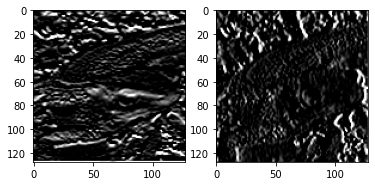

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def BGR2GRAY(img):
    out = 0.2126*img[:,:,0].copy() + 0.7152*img[:,:,1].copy() + 0.0722*img[:,:,2].copy()
    out = out.astype(np.uint8)
    
    return out

def sobel_filter(img, K_size):
    if len(img.shape)==3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H,W,C = img.shape
     
    print(img.shape)
    # zero padding
    pad = K_size//2
    out = np.zeros((H+2*pad, W+2*pad, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    tmp = out.copy()
    
    out_v =tmp.copy() 
    out_h =tmp.copy()
    
    
    # prepare kernel
    Kv = [[1, 2, 1],[0,0,0],[-1,-2,-1]]
    Kh = [[1,0,-1],[2, 0,-2],[1,0,-1]]
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out_v[y, x, c] = np.sum(Kv*tmp[y:y+K_size, x:x+K_size, c])
                out_h[y, x, c] = np.sum(Kh*tmp[y:y+K_size, x:x+K_size, c])
    
    
    # triming
    out_v = out_v[:H, :W]
    out_h = out_h[:H, :W]
    
    out_v = np.clip(out_v, 0, 255).astype(np.uint8)
    out_h = np.clip(out_h, 0, 255).astype(np.uint8)
    
    return out_v, out_h

    
img = cv2.imread('../imori.jpg')
gray = BGR2GRAY(img)
out_v, out_h = sobel_filter(gray, K_size=3)

out_v = np.squeeze(out_v)
out_h = np.squeeze(out_h)

plt.subplot(1,2,1)
plt.imshow(out_v, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(out_h, cmap='gray')

cv2.imwrite('out_v16.jpg', out_v)
cv2.imwrite('out_h16.jpg', out_h)

    
    
    

In [2]:
0.023*200

4.6